### LIBRARIES

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

### DATASET IMPORT

In [249]:
data = pd.read_csv('titanic.csv')

### DATASET EXPLORATION  

Below is a column description for some of the columns in the dataset (as provided by Kaggle):

+ Survived: 0 = No, 1 = Yes
+ Pclass: Ticket class (1st = Upper, 2nd = Middle, 3rd = Lower), which is a proxy for socio-economic status (SES).
+ Age: Age in years. Age is fractional if less than 1. If the age is estimated, it's in the form of xx.5.
+ SibSp: # of siblings/spouses aboard the Titanic (Sibling = brother, sister, stepbrother, stepsister; Spouse = husband, wife (mistresses and fiancés were ignored)).
+ Parch: # of parents/children aboard the Titanic (Parent = mother, father; Child = daughter, son, stepdaughter, stepson; Some children travelled only with a nanny, therefore parch=0 for them).
+ Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [250]:
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [251]:
data.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1300,3.0,1.0,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1.0,0.0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5,0.0,0.0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Drop last row

In [252]:
data.drop(data.index[1309], inplace = True)
data.tail(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.225,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.225,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.875,NaN,S,NaN,NaN,NaN


#### Information about the dataset

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 153.4+ KB


#### Number of NaN's in the “age” "fare", and “embarked” columns

In [254]:
print('Number of NaN in the "age" column:', data.age.isnull().sum())
print('Number of NaN in the "fare" column:', data.fare.isnull().sum())
print('Number of NaN in the "embarked" column:', data.embarked.isnull().sum())

Number of NaN in the "age" column: 263
Number of NaN in the "fare" column: 1
Number of NaN in the "embarked" column: 2


#### Duplicates

In [255]:
data.drop_duplicates().shape[0]

1309

### DATA CLEANING 

#### Drop columns: name, ticket, cabin, boat, body, home.dest

In [256]:
data.drop(['boat', 'name', 'ticket', 'cabin', 'body', 'home.dest'], axis = 1, inplace = True)
data

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S
...,...,...,...,...,...,...,...,...
1304,3.0,0.0,female,14.5000,1.0,0.0,14.4542,C
1305,3.0,0.0,female,NaN,1.0,0.0,14.4542,C
1306,3.0,0.0,male,26.5000,0.0,0.0,7.2250,C
1307,3.0,0.0,male,27.0000,0.0,0.0,7.2250,C


#### Substituting 263 NaN's in the “age” column with an estimated average age for males and females

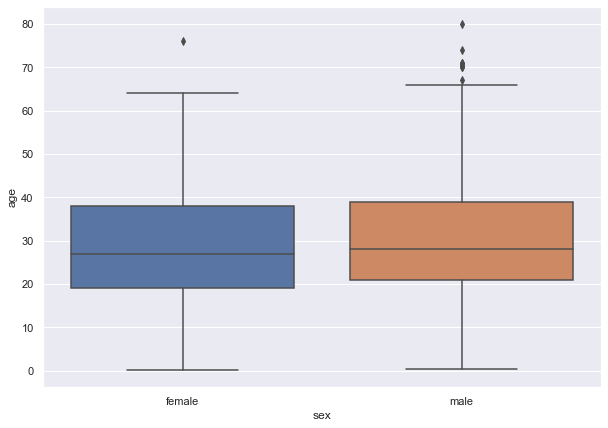

In [257]:
plt.figure(figsize = (10, 7))
sns.set(style="darkgrid")
sns.boxplot(x = 'sex', y = 'age', data = data, palette = 'deep');

#### According to the above chart, the average male age is around 28 years old and the average female age is around 27 years old

In [258]:
def Add_Age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 28
        else:
            return 27
    else:
        return age

In [259]:
data['age'] = data[['age', 'sex']].apply(Add_Age, axis = 1)

In [260]:
print('Number of NaN in the "age" column:', data.age.isnull().sum())

Number of NaN in the "age" column: 0


#### Substituting 2 NaN's in the "embarked" column with values using backfill method

In [261]:
data['embarked'].fillna(method = 'bfill', axis = 0, inplace=True)

In [262]:
print('Number of NaN in the "embarked" column:', data.embarked.isnull().sum())

Number of NaN in the "embarked" column: 0


#### Substituting 1 NaN in the "fare" column with an average fare cost

In [263]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(data.iloc[:, 6:7])
data.iloc[:, 6:7] = imputer.transform(data.iloc[:, 6:7])

In [264]:
print('Number of NaN in the "fare" column:', data.fare.isnull().sum())

Number of NaN in the "fare" column: 0


#### Encoding male/female categories in the “sex” column and removing dummy variable trap

In [265]:
female_dummy = pd.get_dummies(data['sex']).drop('male', axis = 1)
data.drop('sex', axis = 1, inplace = True)
data = pd.concat([data, female_dummy], axis = 1)
data

,pclass,survived,age,sibsp,parch,fare,embarked,female
0,1.0,1.0,29.0000,0.0,0.0,211.3375,S,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,S,0
2,1.0,0.0,2.0000,1.0,2.0,151.5500,S,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,S,0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,S,1
...,...,...,...,...,...,...,...,...
1304,3.0,0.0,14.5000,1.0,0.0,14.4542,C,1
1305,3.0,0.0,27.0000,1.0,0.0,14.4542,C,1
1306,3.0,0.0,26.5000,0.0,0.0,7.2250,C,0
1307,3.0,0.0,27.0000,0.0,0.0,7.2250,C,0


#### Encoding “embarked” categories and removing dummy variable trap

In [266]:
embarked_dummy = pd.get_dummies(data['embarked']).drop('Q', axis = 1)
data.drop('embarked', axis = 1, inplace = True)
data = pd.concat([data, embarked_dummy], axis = 1)
data

,pclass,survived,age,sibsp,parch,fare,female,C,S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1,0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,0,0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1,0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,0,0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1,0,1
...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,14.5000,1.0,0.0,14.4542,1,1,0
1305,3.0,0.0,27.0000,1.0,0.0,14.4542,1,1,0
1306,3.0,0.0,26.5000,0.0,0.0,7.2250,0,1,0
1307,3.0,0.0,27.0000,0.0,0.0,7.2250,0,1,0


#### Assigning X and y variables

In [267]:
X = data.drop('survived', axis = 1).values
y = data['survived'].values

In [268]:
print(X[1308])

[ 3.    29.     0.     0.     7.875  0.     0.     1.   ]


In [269]:
print(y[1308])

0.0


#### Splitting X and y into train and test sets

In [270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

In [271]:
X_train.shape[0]

1243

In [272]:
X_test.shape[0]

66

In [273]:
y_train.shape[0]

1243

In [274]:
y_test.shape[0]

66

#### Feature scaling

In [275]:
data.sibsp.describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sibsp, dtype: float64

In [276]:
data.parch.describe()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: parch, dtype: float64

In [277]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 1:5] = sc.fit_transform(X_train[:, 1:5])
X_test[:, 1:5] = sc.transform(X_test[:, 1:5])

In [278]:
X_train[:2, :]

array([[ 2.        , -0.4243738 , -0.4790968 , -0.4382821 , -0.39558059,
         0.        ,  0.        ,  1.        ],
       [ 3.        , -0.19019394, -0.4790968 , -0.4382821 , -0.50587999,
         0.        ,  1.        ,  0.        ]])

In [279]:
X_test[:2, :]

array([[ 3.        ,  0.66846555, -0.4790968 , -0.4382821 , -0.49306807,
         0.        ,  0.        ,  1.        ],
       [ 2.        , -0.65855366, -0.4790968 ,  0.71348248, -0.24278489,
         1.        ,  0.        ,  1.        ]])

### XGB MODEL TRAINING

In [280]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

### TRAINING & TESTING DATA SCORES

In [281]:
print(f"Training Data Score: {round(classifier.score(X_train, y_train), 2)}")
print(f"Testing Data Score: {round(classifier.score(X_test, y_test), 2)}")

Training Data Score: 0.85
Testing Data Score: 0.83


### XGB MODEL TESTING

In [282]:
y_predict = classifier.predict(X_test)

In [283]:
y_predict

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.])

In [284]:
y_test

array([0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.])

### CONFUSION MATRIX 


Confusion Matrix results for XGB Model are: 

[[35  4]
 [ 7 20]]

Accuracy: 0.83




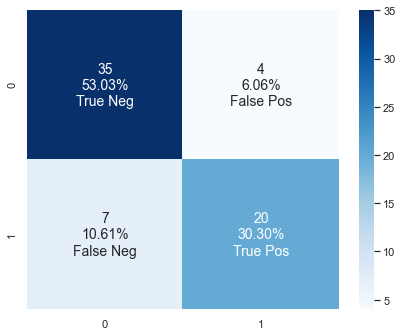

In [285]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f'\nConfusion Matrix results for XGB Model are: \n\n{cm}\n\nAccuracy: {round(accuracy, 2)}\n\n')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_counts,group_percentages,group_names)]
labels = np.asarray(labels).reshape(2,2)

f, ax=plt.subplots(figsize=(7, 5.5))
sns.heatmap(cm, annot = labels, fmt = '', annot_kws = {'size':14}, cmap='Blues');

### CLASSIFICATION REPORT

In [286]:
from sklearn.metrics import classification_report
print(f'\nClassification Report for XGB Model\n\n\n{classification_report(y_test, y_predict)}')


Classification Report for XGB Model


              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86        39
         1.0       0.83      0.74      0.78        27

    accuracy                           0.83        66
   macro avg       0.83      0.82      0.82        66
weighted avg       0.83      0.83      0.83        66



### MEAN SQUARED ERROR (MSE)

In [287]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_predict)
print(f"MSE: {round(MSE, 2)}")

MSE: 0.17


### CROSS VALIDATION

In [288]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))

Accuracy: 80.69%
Standard Deviation: 3.51%
